# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1.0 Start the Environment and load dependencies

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ../python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

INFO:matplotlib.font_manager:Generating new fontManager, this may take some time...
INFO:matplotlib.font_manager:Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face.  Unknown file format.


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2.0 Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 2.1 Instansiate agen and test it as baseline

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0)

env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state

score = 0                                          # initialize the score
while True:
    action = agent.act(state)       # select an action

    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))


Score: 0.0


### 3.0 Training of the Agent with DQN

In [7]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)       # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0] 
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

Episode 100	Average Score: 0.34
Episode 200	Average Score: 3.89
Episode 300	Average Score: 6.73
Episode 400	Average Score: 11.10
Episode 500	Average Score: 13.60
Episode 600	Average Score: 13.85
Episode 700	Average Score: 14.40
Episode 800	Average Score: 15.44
Episode 900	Average Score: 16.15
Episode 1000	Average Score: 15.58
Episode 1100	Average Score: 16.18
Episode 1200	Average Score: 16.40
Episode 1300	Average Score: 16.29
Episode 1400	Average Score: 15.39
Episode 1500	Average Score: 15.91
Episode 1600	Average Score: 15.98
Episode 1700	Average Score: 15.71
Episode 1800	Average Score: 15.44
Episode 1900	Average Score: 15.90
Episode 2000	Average Score: 16.09


### 3.1 Training plots

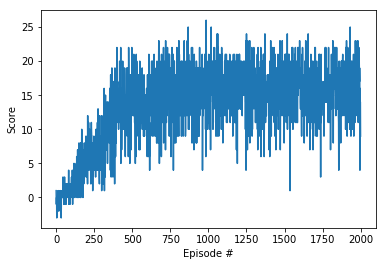

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Agent evaluation

In [10]:
import time

In [12]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

# test performance of the agent over 100 episodes
for i in range(100):
    scores = []      
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0
    for t in range(1000):
        if i>97:
            time.sleep(.12)
        action = agent.act(state)       # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0] 
            
        state = next_state
        score += reward
        if done:
            break 
    
    print(f"Episode {i+1}/100, score {score}")
    scores.append(score)

print("\n\nAverage score", np.mean(scores))

if np.mean(scores)>13:
    print("Success!")
    #env.close()

Episode 1/100, score 22.0
Episode 2/100, score 1.0
Episode 3/100, score 3.0
Episode 4/100, score 4.0
Episode 5/100, score 22.0
Episode 6/100, score 0.0
Episode 7/100, score 20.0
Episode 8/100, score 27.0
Episode 9/100, score 21.0
Episode 10/100, score 1.0
Episode 11/100, score 21.0
Episode 12/100, score 0.0
Episode 13/100, score 11.0
Episode 14/100, score 18.0
Episode 15/100, score 8.0
Episode 16/100, score 22.0
Episode 17/100, score 13.0
Episode 18/100, score 16.0
Episode 19/100, score 13.0
Episode 20/100, score 16.0
Episode 21/100, score 19.0
Episode 22/100, score 8.0
Episode 23/100, score 13.0
Episode 24/100, score 13.0
Episode 25/100, score 22.0
Episode 26/100, score 15.0
Episode 27/100, score 15.0
Episode 28/100, score 20.0
Episode 29/100, score 22.0
Episode 30/100, score 19.0
Episode 31/100, score 17.0
Episode 32/100, score 14.0
Episode 33/100, score 16.0
Episode 34/100, score 11.0
Episode 35/100, score 10.0
Episode 36/100, score 20.0
Episode 37/100, score 17.0
Episode 38/100, sc